In [1]:
import gym 
import slimevolleygym

env = gym.make('SlimeVolley-v0')

# Observation Space Printing 
print(env.observation_space)  # Will show Box space with 12 dimensions
print(env.reset().shape) 

Box([-3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38], [3.403e+38 3.403e+38 3.403e+38 3.403e+38 3.403e+38 3.403e+38 3.403e+38 3.403e+38 3.403e+38 3.403e+38 3.403e+38 3.403e+38], (12,), float32)
(12,)


In [10]:
obs, reward, done, info = env.step(env.action_space.sample())

In [11]:
print("Obs: ", obs)
print("Other Obs: ", info['otherObs'])

Obs:  [ 1.317  0.275  1.75   1.154  0.     1.2    1.595  1.388  1.142  0.15  -1.75   0.   ]
Other Obs:  [ 1.142  0.15  -1.75   0.     0.     1.2   -1.595  1.388  1.317  0.275  1.75   1.154]


In [5]:
# test with loaded NEATPolicy 
import pickle, neat, glob 
from slimevolleygym.mlp import NEATPolicy

config_path = 'zoo/neat_sp/config-neat'
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                neat.DefaultSpeciesSet, neat.DefaultStagnation,
                config_path)

pop = neat.Population(config)

genomes = list(pop.population.items())
genome = genomes[1][1]

net = NEATPolicy(genome, config_path)


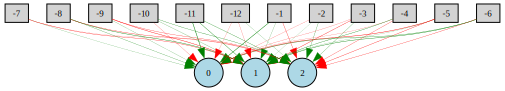

In [6]:
from slimevolleygym.visualize import draw_net
draw_net(config, genome) # Issue: No connection between input-output nodes

In [1]:
# What is the structure of GA adopted network? 

from slimevolleygym.mlp import games as games
from slimevolleygym.mlp import Model

policy_left = Model(games['slimevolleylite']) # observation -> action model with specific network structure


/var/folders/nn/nbsb8w3570zfgs23h2s0cdzm0000gn/T/ipykernel_45113/1308420274.py:6: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  policy_left = Model(games['slimevolleylite']) # observation -> action model with specific network structure


In [14]:
# policy_left.__dir__().__module__()
# policy_left.game
# games['slimevolleylite'].layers # 4 layer, input (12), hidden (10), hidden (10), output (3)

# If GA could do it, NEAT could do it, as simple as that .... 





self = policy_left
self.weight[2].shape


(10, 3)

In [22]:
connection = genome.connections[(-1,0)] # how to modify this gene?
connection.weight = 0.1

In [25]:
# Verification of Genome Save & Load gives same network

import numpy as np

net = NEATPolicy(genome, config_path) # 

# Add debug prints to check genome and network properties
connection = genome.connections[(-1,0)] # how to modify this gene?
connection.weight = 0.1

print("Genome Connections with weights:")
for key, conn in genome.connections.items():
    print(f"Connection {key}: weight={conn.weight}")

# Test network outputs before saving
test_input = np.random.uniform(0, 1, 12)
print("Original Output:", net.net.activate(test_input))

# Save and reload test
with open("test_genome.pkl", "wb") as f:
    pickle.dump(genome, f)
    
with open("test_genome.pkl", "rb") as f:
    loaded_genome = pickle.load(f)
    
# print("Genome Connections with weights:")
# for key, conn in genome.connections.items():
#     print(f"Connection {key}: weight={conn.weight}")
    
test_net = NEATPolicy(loaded_genome, config_path)
print("Loaded Output:", test_net.net.activate(test_input))



Genome Connections with weights:
Connection (-1, 0): weight=0.1
Connection (-1, 1): weight=0.30433766566585
Connection (-1, 2): weight=-0.9493023882738519
Connection (-2, 0): weight=-0.32324689035491067
Connection (-2, 1): weight=0.01558919004562363
Connection (-2, 2): weight=0.6374391702629644
Connection (-3, 0): weight=-0.37076042747925647
Connection (-3, 1): weight=-1.1701060331016058
Connection (-3, 2): weight=0.5059507785789044
Connection (-4, 0): weight=-0.2458734057966029
Connection (-4, 1): weight=1.072921883312836
Connection (-4, 2): weight=-0.7263632388585732
Connection (-5, 0): weight=-1.6233248958943707
Connection (-5, 1): weight=0.16296831704401257
Connection (-5, 2): weight=-1.059347403746929
Connection (-6, 0): weight=0.9224563997631747
Connection (-6, 1): weight=1.3672055297384056
Connection (-6, 2): weight=-0.8680968682747421
Connection (-7, 0): weight=0.24977589071164852
Connection (-7, 1): weight=-0.9809300873992517
Connection (-7, 2): weight=-0.04808453446921073
Con

In [7]:
import numpy as np 
for i in range(100):
    obs = np.random.uniform(0, 1, 12)
    print(net.predict(obs))
    
# Bug :: NEAT network always give 0.0 output all the time, irrelevant to input values ...

[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[1, 0, 0]
[0, 1, 0]
[0, 1, 0]
[1, 0, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[1, 0, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[1, 0, 0]
[1, 0, 0]
[0, 1, 0]
[1, 0, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[1, 0, 0]
[1, 0, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[1, 0, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[1, 0, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[1, 0, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[1, 0, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[1, 0, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[1, 0, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[1, 0, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[1, 0, 0]
[0, 1, 0]
[1, 0, 0]
[0, 1, 0]


In [4]:
output = net.activate(obs)


In [10]:
# Convert output to one-hot vector using argmax
act_idx = max(range(len(output)), key=lambda i: output[i])
action = [1 if i == act_idx else 0 for i in range(3)]



In [1]:
json_path = "training_scripts/ga_jacobian_estimate1/jacobian_00050000.json"
import json 

with open(json_path, 'r') as f:
    indiv = json.load(f)

In [9]:
indiv[0]

[-5072.826979088339,
 4933.387686635788,
 9431.561715266524,
 4113.30673515173,
 -615.5941418529636,
 1458.2436133047415,
 3559.8421182040297,
 1499.2938611844415,
 1466.7920577520113,
 -471.3342033742742,
 7100.613421611591,
 9303.45190967016,
 699.2667974254717,
 2441.0228447429927,
 992.4905994196324,
 -3037.449829621176,
 -1618.0541122258228,
 -8647.652361615288,
 4891.6542348968715,
 2265.712661273853,
 -729.5874532010318,
 -5232.074272312667,
 -830.2854399668278,
 3960.0916841586295,
 -5466.901416304018,
 78.07653243011511,
 -3773.599295257106,
 -152.6211568601065,
 2644.8004752547026,
 -2786.785368101121,
 -747.7998078083177,
 1882.4878887934178,
 218.31003560967883,
 2396.3338058002205,
 9807.07674470568,
 811.0177638712457,
 5252.26565868166,
 496.9773649070652,
 697.3283244079784,
 1120.8359864157221,
 -2578.320019422595,
 -7767.476826741164,
 -1905.9980405658105,
 -1407.4482324032047,
 485.9267627360202,
 -633.7675087748945,
 198.0908368176904,
 12.118463853696198,
 9183.315